### Del a

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("support_uke_24.xlsx")

u_dag = data['Ukedag'].values
kl_slett = data['Klokkeslett'].values
varighet = data['Varighet'].values
score = data['Tilfredshet'].values

### Del b

<BarContainer object of 5 artists>

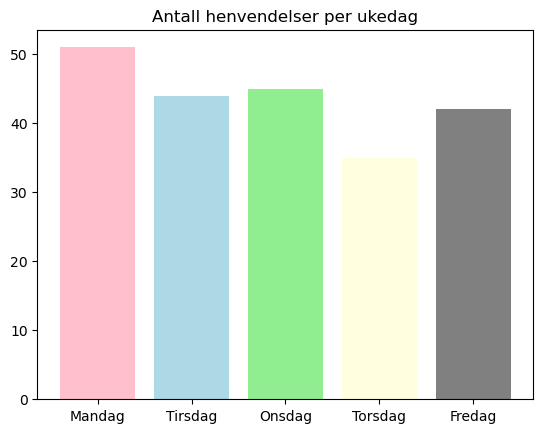

In [81]:
Mandag = 0
Tirsdag = 0
Onsdag = 0
Torsdag = 0
Fredag = 0
i=0

for i in u_dag:
    if i=='Mandag':
        Mandag +=1
    elif i=='Tirsdag':
        Tirsdag +=1
    elif i=='Onsdag':
        Onsdag +=1
    elif i=='Torsdag':
        Torsdag +=1
    else:
        Fredag +=1

sizes = [Mandag, Tirsdag, Onsdag, Torsdag, Fredag]
labels = ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag"]
colors = ["pink", "lightblue", "lightgreen", "lightyellow", "grey"]

plt.title("Antall henvendelser per ukedag")
plt.bar(labels, sizes, color=colors)

### Del c

In [120]:
from datetime import datetime

ny_varighet = []

for i in varighet:
    tid = datetime.strptime(i, '%H:%M:%S').time()
    ny_varighet.append(tid)

laveste_verdi = min(ny_varighet)
høyeste_verdi = max(ny_varighet)
print("Korteste loggførte samtaletid er:", laveste_verdi)
print("Lengeste loggførte samtaletid er:", høyeste_verdi)

Korteste loggførte samtaletid er: 00:00:59
Lengeste loggførte samtaletid er: 00:11:28


### Del d

In [179]:
from datetime import timedelta

total_tid = sum((timedelta(hours=tid.hour, minutes=tid.minute, seconds=tid.second) for tid in ny_varighet), timedelta())
gjennomsnitt_tid = total_tid / len(ny_varighet)

print(f"Gjennomsnittlig tid er: {gjennomsnitt_tid}")

Gjennomsnittlig tid er: 0:06:40.009217


### Del e

([<matplotlib.patches.Wedge at 0x213352225a0>,
 [Text(-1.0873151497178102, 0.16657060123003706, 'kl.08-10'),
  Text(0.2987760148820904, -1.0586467271621716, 'kl.10-12'),
  Text(1.097666462878893, -0.07161240305240402, 'kl.12-14'),
  Text(0.5198526288682663, 0.9694087085738154, 'kl.14-16')],
 [Text(-0.5930809907551692, 0.0908566915800202, '45.2%'),
  Text(0.1629687353902311, -0.5774436693611844, '18.4%'),
  Text(0.5987271615703053, -0.03906131075585673, '20.7%'),
  Text(0.2835559793826907, 0.5287683864948084, '15.7%')])

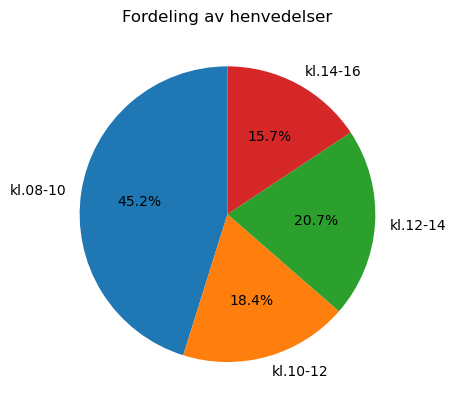

In [154]:
ny_kl_slett = []

for i in kl_slett:
    tidspunkt = datetime.strptime(i, '%H:%M:%S').time()
    ny_kl_slett.append(tidspunkt)

bolk1 = 0 #8-10
bolk2 = 0 #10-12
bolk3 = 0 #12-14
bolk4 = 0 #14-16

for e in ny_kl_slett:
    if e>=datetime.strptime("08:00:00", '%H:%M:%S').time() and e<datetime.strptime("10:00:00", '%H:%M:%S').time():
        bolk1 +=1
    elif e>=datetime.strptime("10:00:00", '%H:%M:%S').time() and e<datetime.strptime("12:00:00", '%H:%M:%S').time():
        bolk2 +=1
    elif e>=datetime.strptime("12:00:00", '%H:%M:%S').time() and e<datetime.strptime("14:00:00", '%H:%M:%S').time():
        bolk3 +=1
    else:
        bolk4 +=1

sizes =  [bolk1, bolk2, bolk3, bolk4]
labels =  ["kl.08-10", "kl.10-12", "kl.12-14", "kl.14-16"]

plt.title("Fordeling av henvedelser")
plt.pie(sizes, labels=labels, autopct = "%1.1f%%", startangle = 90)

### Del f

In [166]:
negativ = 0
nøytral = 0
positiv = 0

for s in score:
    if 1<=s<=6:
        negativ +=1
    elif 7<=s<=8:
        nøytral +=1
    elif 8<=s<=10:
        positiv +=1

total = negativ + nøytral + positiv
pros_pos = positiv/total*100
pros_neg = negativ/total*100

NPS = pros_pos - pros_neg

print(f'NPS = {NPS:.2f} %')

NPS = 41.86 %
